In [3]:
#          ,  ,
#          \\ \\           
#          ) \\ \\    _p_ 
#          )^\))\))  /  *\ 
#           \_|| || / /^`-'  MOD 3
#  __       -\ \\--/ /     PROJECT
#<'  \\___/   ___. )'     FLATIRON
#     `====\ )___/\\        SCHOOL
#          //     `"          DATA
#          \\    /  \      SCIENCE
#          `"

In [357]:
import pandas as pd
import datetime
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
# This is the truncated version of the larger file
df = pd.read_csv('health inspection.csv', parse_dates=['inspection_date'])

# For some reason it added the index back into dataframe, so I removed it
df.drop('Unnamed: 0', axis=1, inplace = True)

# This allows us to see the entire text in dataframe cells
pd.set_option('display.max_colwidth', -1)

# create a readable address
df['ADDRESS'] = df['BUILDING'] + ' ' + df['STREET']

# drop the columns that made up the address
df.drop(['BUILDING', 'STREET'], axis=1, inplace = True)

# removes the columns that were added to the dataframe minus CAMIS, which is the unique ID for the restaurant
df.drop(['VIOLATION DESCRIPTION', 'VIOLATION CODE', 'ACTION', 'CRITICAL FLAG'], axis=1, inplace = True)

df_unique = df.drop_duplicates(subset=['CAMIS', 'inspection_date'], keep='first')

df_weather = pd.read_csv('df_weather.csv', parse_dates=['datetime'])

df_weather.drop('Unnamed: 0', axis=1, inplace = True)

merge_1 = pd.merge(df_unique, df_weather, how='left', left_on='inspection_date', right_on='datetime')

merge_1 = pd.merge(df_unique, df_weather, how='left', left_on='inspection_date', right_on='datetime')

In [15]:
# creates a day of the week column, but also converts the inspection_date column
# to the day of the week
day_of_week = [None] * len(merge_1['inspection_date'])
for i in range(len(merge_1['inspection_date'])):
    dt = merge_1['inspection_date'][i]
    #year, month, day = (int(x) for x in dt.split('-'))    
    answer = dt.weekday()
    if answer == 0:
        day_of_week[i] = 'Monday'
    if answer == 1:
        day_of_week[i] = 'Tuesday'
    if answer == 2:
        day_of_week[i] = 'Wednesday'
    if answer == 3:
        day_of_week[i] = 'Thursday'
    if answer == 4:
        day_of_week[i] = 'Friday'
    if answer == 5:
        day_of_week[i] = 'Saturday'
    if answer == 6:
        day_of_week[i] = 'Sunday'
    if i % 250 == 0:
        print(i)
merge_1['DAY OF WEEK'] = day_of_week

0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750
5000
5250
5500
5750
6000
6250
6500
6750
7000
7250
7500
7750
8000
8250
8500
8750
9000
9250
9500
9750
10000
10250
10500
10750
11000
11250
11500
11750
12000
12250
12500
12750
13000
13250
13500
13750
14000
14250
14500
14750
15000
15250
15500
15750
16000
16250
16500
16750
17000
17250
17500
17750
18000
18250
18500
18750
19000
19250
19500
19750
20000
20250
20500
20750
21000
21250
21500
21750
22000
22250
22500
22750
23000
23250
23500
23750
24000
24250
24500
24750
25000
25250
25500
25750
26000
26250
26500
26750
27000
27250
27500
27750
28000
28250
28500
28750
29000
29250
29500
29750
30000
30250
30500
30750
31000
31250
31500
31750
32000
32250
32500
32750
33000
33250
33500
33750
34000
34250
34500
34750
35000
35250
35500
35750
36000
36250
36500
36750
37000
37250
37500
37750
38000
38250
38500
38750
39000
39250
39500
39750
40000
40250
40500
40750
41000
41250
41500
41750
42000
42250
42500
42750
43000
43250
43

In [16]:
merge_1.drop('datetime', axis=1, inplace=True)

rest = df_unique[['CAMIS', 'DBA']]

rest_unique = rest.drop_duplicates(subset=['CAMIS', 'DBA'], keep='first')

sorted_rest_unique = rest_unique.groupby('DBA').count().sort_values(['CAMIS'], ascending=False)

pd.set_option('display.max_rows', 100)

rest_unique_zip = zip_df.drop_duplicates(subset=['CAMIS', 'DBA', 'ZIPCODE'], keep='first')

In [350]:
rest_unique_zip.head()

,CAMIS,DBA,ZIPCODE
0,30075445,MORRIS PARK BAKE SHOP,10462.0
7,30112340,WENDY'S,11225.0
16,30191841,DJ REYNOLDS PUB AND RESTAURANT,10019.0
23,40356018,RIVIERA CATERERS,11224.0
29,40356151,BRUNOS ON THE BOULEVARD,11369.0


In [24]:
rest_unique_zip = zip_df.drop_duplicates(subset=['CAMIS', 'DBA', 'ZIPCODE'], keep='first')

In [351]:
rest_unique_zip.head()

,CAMIS,DBA,ZIPCODE
0,30075445,MORRIS PARK BAKE SHOP,10462.0
7,30112340,WENDY'S,11225.0
16,30191841,DJ REYNOLDS PUB AND RESTAURANT,10019.0
23,40356018,RIVIERA CATERERS,11224.0
29,40356151,BRUNOS ON THE BOULEVARD,11369.0


In [156]:
day_of_week_avg = merge_2.groupby(['DAY OF WEEK']).mean()

In [157]:
day_of_week_avg.drop(['CAMIS', 'ZIPCODE'], axis=1, inplace=True)

In [158]:
day_of_week_avg.reset_index(inplace=True)

In [159]:
merge_2['DAY OF WEEK'].value_counts()

Wednesday    19205
Thursday     19173
Tuesday      17809
Monday       14518
Friday       11074
Saturday     2716 
Sunday       81   
Name: DAY OF WEEK, dtype: int64

In [160]:
day_of_week_avg

,DAY OF WEEK,SCORE
0,Friday,14.709861
1,Monday,15.633214
2,Saturday,15.986009
3,Sunday,11.888889
4,Thursday,15.729933
5,Tuesday,15.508002
6,Wednesday,15.700807


In [141]:
merge_1.describe()

,CAMIS,ZIPCODE,SCORE
count,8.720200e+04,85883.000000,87202.000000
mean,4.610122e+07,10681.208726,15.515711
std,4.402538e+06,596.329293,11.952722
min,3.007544e+07,10000.000000,0.000000
25%,4.139498e+07,10022.000000,9.000000
50%,5.000574e+07,10469.000000,12.000000
75%,5.005630e+07,11229.000000,20.000000
max,5.009364e+07,12345.000000,166.000000


In [97]:
merge_1 = merge_1[merge_1['SCORE'] > -1]

merge_1 = merge_1[merge_1['INSPECTION TYPE'] != 'Pre-permit (Non-operational) / Initial Inspection']

In [352]:
merge_1.shape

(87202, 15)

In [353]:
merge_1[merge_1['INSPECTION TYPE'] == 'Pre-permit (Operational) / Initial Inspection']

,CAMIS,DBA,BORO,ZIPCODE,PHONE,CUISINE DESCRIPTION,SCORE,GRADE,GRADE DATE,INSPECTION TYPE,inspection_date,ADDRESS,Weather,DAY OF WEEK,weather_binary
56356,50038623,TIME FLIES BBQ & BAR,QUEENS,11358.0,7188889068,Chinese,53.0,NaN,NaN,Pre-permit (Operational) / Initial Inspection,2017-12-11,163-08 NORTHERN BLVD,rain,Monday,1
59481,50044339,EL PATRON BAR,BROOKLYN,11214.0,9178871365,Mexican,13.0,A,09/22/2017,Pre-permit (Operational) / Initial Inspection,2017-09-22,7507 NEW UTRECHT AVE,none,Friday,0
59824,50044654,GANTRY BAR & KITCHEN,QUEENS,11101.0,7187376309,American,7.0,A,08/03/2017,Pre-permit (Operational) / Initial Inspection,2017-08-03,4702 VERNON BLVD,none,Thursday,0
60088,50044908,CHIVE BLOSSOM,BROOKLYN,11249.0,7185763571,Asian,10.0,NaN,NaN,Pre-permit (Operational) / Initial Inspection,2017-07-19,394 BEDFORD AVE,none,Wednesday,0
60858,50045766,MASSERIA CAFFE,MANHATTAN,10036.0,2129690900,Italian,18.0,NaN,NaN,Pre-permit (Operational) / Initial Inspection,2017-09-18,235 W 48TH ST,none,Monday,0
60863,50045770,THE LOT RADIO KIOSK,BROOKLYN,11222.0,3474466553,CafÃ©/Coffee/Tea,136.0,NaN,NaN,Pre-permit (Operational) / Initial Inspection,2019-01-16,17 NASSAU AVE,none,Wednesday,0
60973,50045839,AUTENTICO TACOS,QUEENS,11373.0,2123486222,Mexican,15.0,NaN,NaN,Pre-permit (Operational) / Initial Inspection,2017-08-05,9118 59TH AVE,rain,Saturday,1
61190,50046056,OUH MOA NA,QUEENS,11355.0,7188770394,Korean,32.0,NaN,NaN,Pre-permit (Operational) / Initial Inspection,2017-10-19,14914 41ST AVE,none,Thursday,0
61223,50046091,PLAYROOM NYC,MANHATTAN,10034.0,6466237900,"Bottled beverages, including water, sodas, juices, etc.",11.0,A,10/05/2017,Pre-permit (Operational) / Initial Inspection,2017-10-05,3964 10TH AVE,rain,Thursday,1
61751,50046749,ET AL.,MANHATTAN,10002.0,9175483857,Other,9.0,A,03/23/2018,Pre-permit (Operational) / Initial Inspection,2018-03-23,191 CHRYSTIE ST,none,Friday,0


In [142]:
merge_1['GRADE'].value_counts()

A                 48549
B                 4364 
C                 1459 
P                 1267 
Z                 983  
Not Yet Graded    374  
G                 2    
Name: GRADE, dtype: int64

In [144]:
merge_1.shape

(87202, 14)

In [149]:
merge_2 = merge_1[merge_1['GRADE'] != 'Z']
merge_2 =merge_2[merge_2['GRADE'] != 'P']
merge_2 =merge_2[merge_2['GRADE'] != 'G']
merge_2 =merge_2[merge_2['GRADE'] != 'Not Yet Graded']

In [182]:
merge_2.describe()

,CAMIS,ZIPCODE,SCORE,weather_binary
count,8.457600e+04,83293.000000,84576.000000,84576.000000
mean,4.606343e+07,10679.280588,15.530966,0.432191
std,4.406450e+06,596.291410,11.798497,0.495384
min,3.007544e+07,10000.000000,0.000000,0.000000
25%,4.138947e+07,10022.000000,9.000000,0.000000
50%,5.000518e+07,10468.000000,12.000000,0.000000
75%,5.005539e+07,11229.000000,19.000000,1.000000
max,5.009228e+07,12345.000000,166.000000,1.000000


In [161]:
merge_2['GRADE'].value_counts()

A    48549
B    4364 
C    1459 
Name: GRADE, dtype: int64

In [163]:
merge_2

,CAMIS,DBA,BORO,ZIPCODE,PHONE,CUISINE DESCRIPTION,SCORE,GRADE,GRADE DATE,INSPECTION TYPE,inspection_date,ADDRESS,Weather,DAY OF WEEK
0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,7188924968,Bakery,18.0,NaN,NaN,Cycle Inspection / Initial Inspection,2019-05-16,1007 MORRIS PARK AVE,rain,Thursday
1,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,7188924968,Bakery,5.0,A,05/11/2018,Cycle Inspection / Initial Inspection,2018-05-11,1007 MORRIS PARK AVE,rain,Friday
2,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,13.0,A,03/04/2019,Cycle Inspection / Initial Inspection,2019-03-04,469 FLATBUSH AVENUE,snow,Monday
3,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,12.0,A,03/13/2018,Cycle Inspection / Initial Inspection,2018-03-13,469 FLATBUSH AVENUE,snow,Tuesday
4,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,10.0,A,10/06/2017,Cycle Inspection / Re-inspection,2017-10-06,469 FLATBUSH AVENUE,rain,Friday
5,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,7.0,NaN,NaN,Cycle Inspection / Initial Inspection,2017-06-26,469 FLATBUSH AVENUE,none,Monday
6,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,10019.0,2122452912,Irish,12.0,A,05/16/2018,Cycle Inspection / Initial Inspection,2018-05-16,351 WEST 57 STREET,rain,Wednesday
7,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,10019.0,2122452912,Irish,10.0,A,12/14/2017,Cycle Inspection / Re-inspection,2017-12-14,351 WEST 57 STREET,snow,Thursday
8,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,10019.0,2122452912,Irish,13.0,NaN,NaN,Cycle Inspection / Initial Inspection,2017-07-27,351 WEST 57 STREET,none,Thursday
9,40356018,RIVIERA CATERERS,BROOKLYN,11224.0,7183723031,American,10.0,A,10/30/2018,Cycle Inspection / Initial Inspection,2018-10-30,2780 STILLWELL AVENUE,none,Tuesday


In [166]:
merge_1

,CAMIS,DBA,BORO,ZIPCODE,PHONE,CUISINE DESCRIPTION,SCORE,GRADE,GRADE DATE,INSPECTION TYPE,inspection_date,ADDRESS,Weather,DAY OF WEEK
0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,7188924968,Bakery,18.0,NaN,NaN,Cycle Inspection / Initial Inspection,2019-05-16,1007 MORRIS PARK AVE,rain,Thursday
1,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,7188924968,Bakery,5.0,A,05/11/2018,Cycle Inspection / Initial Inspection,2018-05-11,1007 MORRIS PARK AVE,rain,Friday
2,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,13.0,A,03/04/2019,Cycle Inspection / Initial Inspection,2019-03-04,469 FLATBUSH AVENUE,snow,Monday
3,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,12.0,A,03/13/2018,Cycle Inspection / Initial Inspection,2018-03-13,469 FLATBUSH AVENUE,snow,Tuesday
4,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,10.0,A,10/06/2017,Cycle Inspection / Re-inspection,2017-10-06,469 FLATBUSH AVENUE,rain,Friday
5,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,7.0,NaN,NaN,Cycle Inspection / Initial Inspection,2017-06-26,469 FLATBUSH AVENUE,none,Monday
6,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,10019.0,2122452912,Irish,12.0,A,05/16/2018,Cycle Inspection / Initial Inspection,2018-05-16,351 WEST 57 STREET,rain,Wednesday
7,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,10019.0,2122452912,Irish,10.0,A,12/14/2017,Cycle Inspection / Re-inspection,2017-12-14,351 WEST 57 STREET,snow,Thursday
8,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,10019.0,2122452912,Irish,13.0,NaN,NaN,Cycle Inspection / Initial Inspection,2017-07-27,351 WEST 57 STREET,none,Thursday
9,40356018,RIVIERA CATERERS,BROOKLYN,11224.0,7183723031,American,10.0,A,10/30/2018,Cycle Inspection / Initial Inspection,2018-10-30,2780 STILLWELL AVENUE,none,Tuesday


In [180]:
merge_2['weather_binary'] = merge_2.Weather.apply(lambda x: 0 if x == 'none' else 1)

In [186]:
score_df = merge_2[['SCORE', 'weather_binary']]

In [178]:
merge_1

,CAMIS,DBA,BORO,ZIPCODE,PHONE,CUISINE DESCRIPTION,SCORE,GRADE,GRADE DATE,INSPECTION TYPE,inspection_date,ADDRESS,Weather,DAY OF WEEK,weather_binary
0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,7188924968,Bakery,18.0,NaN,NaN,Cycle Inspection / Initial Inspection,2019-05-16,1007 MORRIS PARK AVE,rain,Thursday,1
1,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,7188924968,Bakery,5.0,A,05/11/2018,Cycle Inspection / Initial Inspection,2018-05-11,1007 MORRIS PARK AVE,rain,Friday,1
2,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,13.0,A,03/04/2019,Cycle Inspection / Initial Inspection,2019-03-04,469 FLATBUSH AVENUE,snow,Monday,1
3,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,12.0,A,03/13/2018,Cycle Inspection / Initial Inspection,2018-03-13,469 FLATBUSH AVENUE,snow,Tuesday,1
4,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,10.0,A,10/06/2017,Cycle Inspection / Re-inspection,2017-10-06,469 FLATBUSH AVENUE,rain,Friday,1
5,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,7.0,NaN,NaN,Cycle Inspection / Initial Inspection,2017-06-26,469 FLATBUSH AVENUE,none,Monday,0
6,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,10019.0,2122452912,Irish,12.0,A,05/16/2018,Cycle Inspection / Initial Inspection,2018-05-16,351 WEST 57 STREET,rain,Wednesday,1
7,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,10019.0,2122452912,Irish,10.0,A,12/14/2017,Cycle Inspection / Re-inspection,2017-12-14,351 WEST 57 STREET,snow,Thursday,1
8,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,10019.0,2122452912,Irish,13.0,NaN,NaN,Cycle Inspection / Initial Inspection,2017-07-27,351 WEST 57 STREET,none,Thursday,0
9,40356018,RIVIERA CATERERS,BROOKLYN,11224.0,7183723031,American,10.0,A,10/30/2018,Cycle Inspection / Initial Inspection,2018-10-30,2780 STILLWELL AVENUE,none,Tuesday,0


In [195]:
score_df[score_df['weather_binary'] == 0].std()

SCORE             11.660468
weather_binary    0.000000 
dtype: float64

In [206]:
score_df[score_df['weather_binary'] == 0].mean()

SCORE             15.480728
weather_binary    0.000000 
dtype: float64

In [197]:
merge_2['SCORE'].std()

11.798496825272649

In [198]:
merge_2['SCORE'].mean()

15.530966231555052

In [208]:
score_df[score_df['weather_binary'] == 1].std()

SCORE             11.97726
weather_binary    0.00000 
dtype: float64

In [200]:
score_df[score_df['weather_binary'] == 1].mean()

SCORE             15.596969
weather_binary    1.000000 
dtype: float64

In [203]:
merge_2.to_csv("unique_inspection.csv")

In [354]:
score_df.head()

,SCORE,weather_binary
0,18.0,1
1,5.0,1
2,13.0,1
3,12.0,1
4,10.0,1


In [223]:
precip = np.array(score_df['SCORE'][score_df['weather_binary']==1])

In [224]:
no_precip = np.array(score_df['SCORE'][score_df['weather_binary']==0])

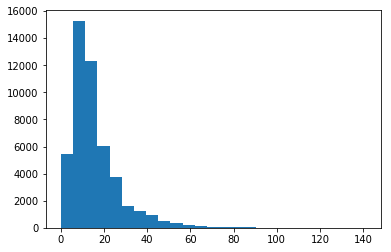

In [235]:
plt.hist(no_precip, bins=25);

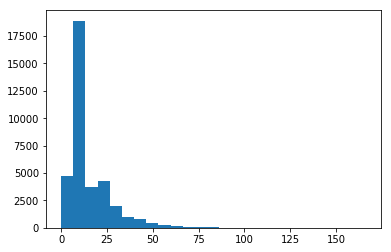

In [234]:
plt.hist(precip, bins=25);

In [321]:
stats.ttest_ind(precip, no_precip, equal_var=False)

Ttest_indResult(statistic=1.4142254927147433, pvalue=0.15729971818191837)

In [258]:
days_df = merge_2[['SCORE','DAY OF WEEK']]
days_df.head()

,SCORE,DAY OF WEEK
0,18.0,Thursday
1,5.0,Friday
2,13.0,Monday
3,12.0,Tuesday
4,10.0,Friday


In [271]:
mon = days_df[days_df['DAY OF WEEK'] == 'Monday']
tues = days_df[days_df['DAY OF WEEK'] == 'Tuesday']
thurs = days_df[days_df['DAY OF WEEK'] == 'Thursday']
fri = days_df[days_df['DAY OF WEEK'] == 'Friday']

In [305]:
mon_tues = pd.concat([mon, tues])
mon_tues.head()

,SCORE,DAY OF WEEK
2,13.0,Monday
5,7.0,Monday
27,13.0,Monday
39,8.0,Monday
40,9.0,Monday


In [310]:
thurs_fri = pd.concat([thurs, fri])
thurs_fri.head()

,SCORE,DAY OF WEEK
0,18.0,Thursday
7,10.0,Thursday
8,13.0,Thursday
10,13.0,Thursday
14,13.0,Thursday


In [334]:
montue = np.array(mon_tues['SCORE'])
thurfri = np.array(thurs_fri['SCORE'])

In [336]:
print(thurfri.mean())
print(thurfri.std())

15.356465103977254
11.793694725200869


In [337]:
print(montue.mean())#mon/tues have higher scores
print(montue.std())

15.564234231447397
11.670953951333273


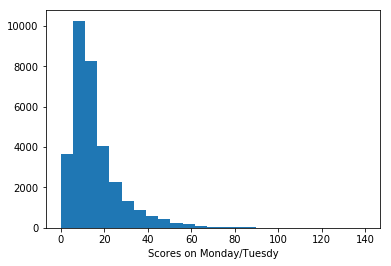

In [356]:
plt.hist(mt, bins=25)
plt.xlabel('Scores on Monday/Tuesdy');

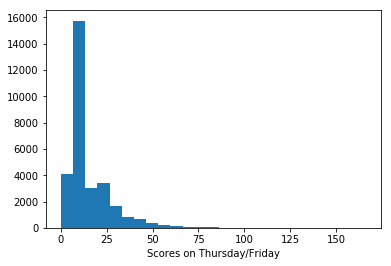

In [355]:
plt.hist(tf, bins=25)
plt.xlabel('Scores on Thursday/Friday');

In [344]:
stats.ttest_ind(thurfri, montue, equal_var=False)

Ttest_indResult(statistic=-2.2132753769214997, pvalue=0.026882281413865797)

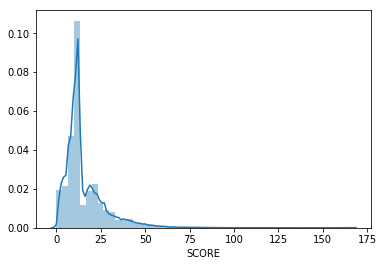

In [361]:
sns.distplot(merge_1.SCORE);